## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(10,8)})
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
df=pd.read_csv("titanic_data.csv")

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Analysis

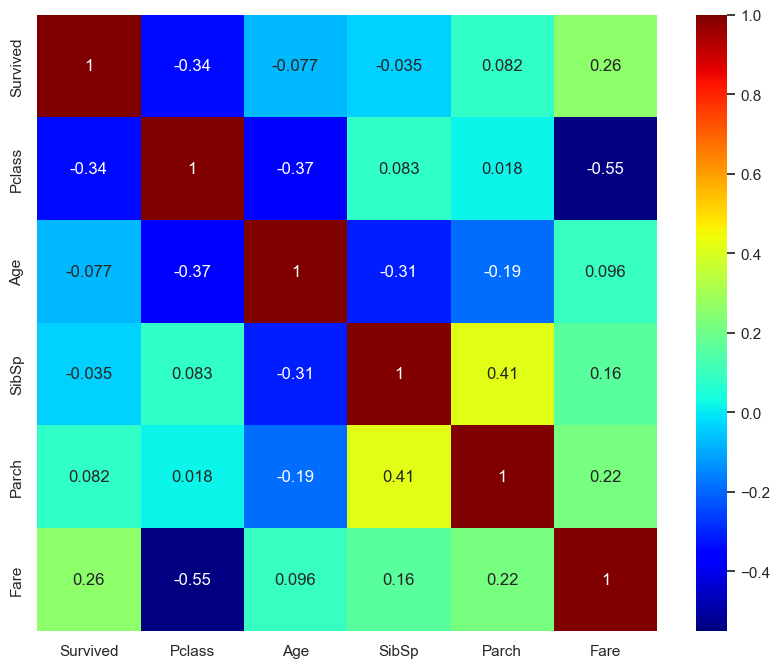

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(),annot=True,cmap='jet')
plt.show()

In [9]:
df[['Survived','Pclass','Age','SibSp','Parch','Fare']]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [10]:
df['SibSp'].nunique()

7

In [11]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

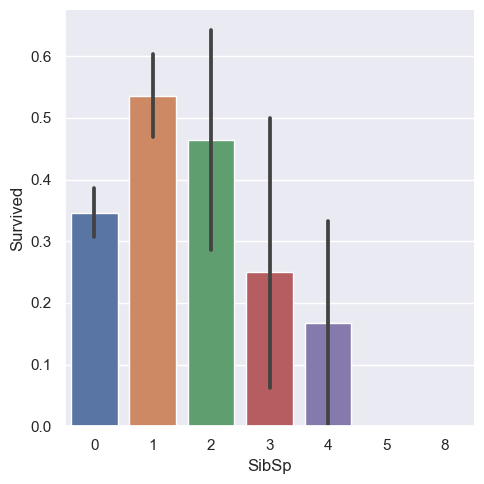

In [12]:
sns.catplot(x='SibSp',y='Survived',data=df,kind='bar')

### Age

<Figure size 1200x900 with 0 Axes>

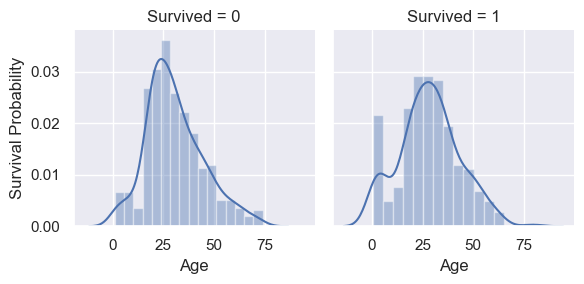

In [13]:
plt.figure(figsize=(12,9))
visual=sns.FacetGrid(df,col='Survived')
visual=visual.map(sns.distplot,'Age').set_ylabels("Survival Probability")
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

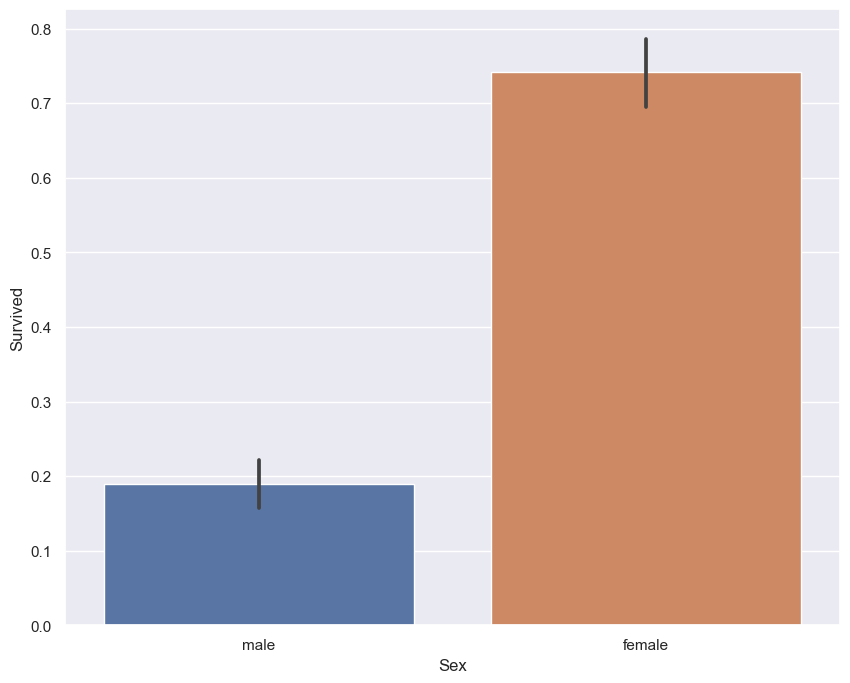

In [14]:
sns.barplot(x='Sex',y='Survived',data=df)

<Axes: xlabel='Sex', ylabel='Survived'>

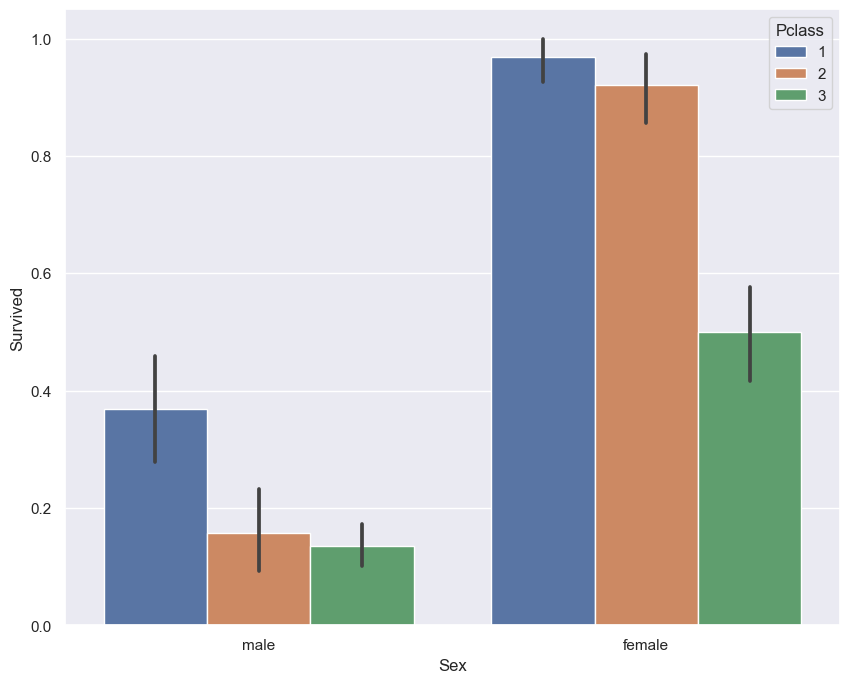

In [15]:
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=df)

In [16]:
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
#As The majority of data belong to the 'S' Embarkment, the null values are filled with 'S'(Southampton)

In [19]:
df['Embarked']=df['Embarked'].fillna('S')

In [20]:
df['Embarked'].isnull().sum()

0

<Axes: xlabel='Embarked', ylabel='Survived'>

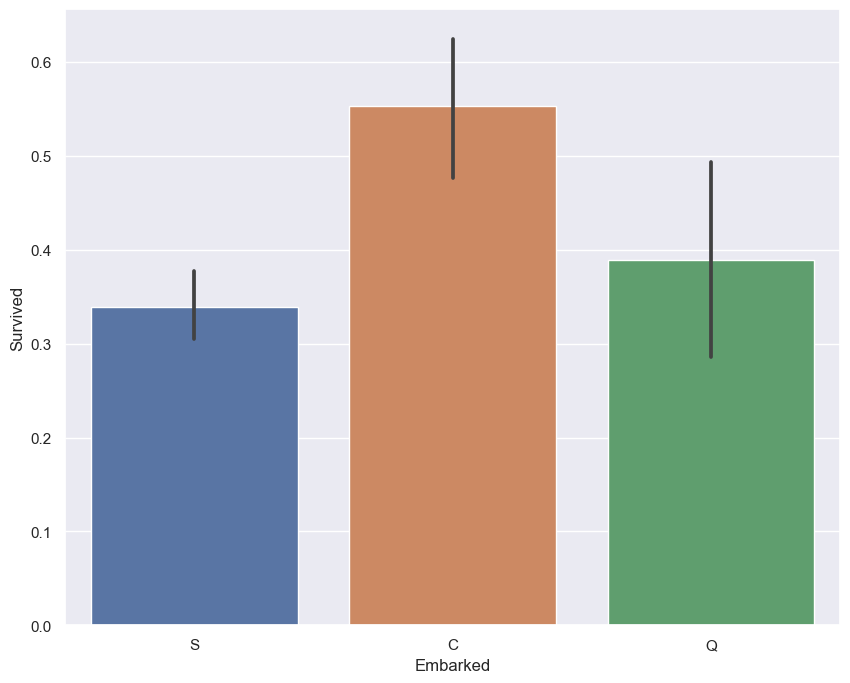

In [21]:
sns.barplot(x='Embarked',y='Survived',data=df)

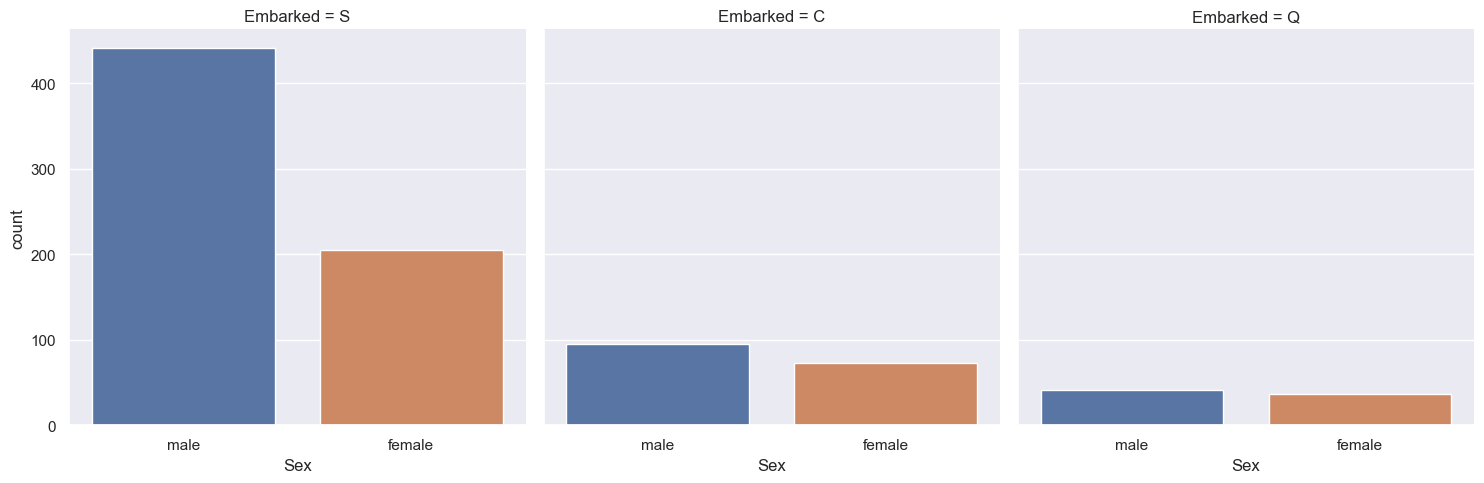

In [22]:
sns.catplot(x='Sex',col='Embarked',data=df,kind='count')

In [23]:
df=pd.read_csv('titanic_data.csv')

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
print("The null values of age is:",df['Age'].isnull().sum())

The null values of age is: 177


##### As there are more null values let us take the distribution from the Facetgrid , that is the guassian curve

##### In guassian curve, the age distribution is in the middle so let us take that

In [26]:
mean=df['Age'].mean()
std=df['Age'].std()

In [27]:
isnull=df['Age'].isnull().sum()

In [28]:
print(mean,std,isnull)

29.69911764705882 14.526497332334044 177


In [29]:
rand_age=np.random.randint(mean-std,mean+std,size=isnull)

In [30]:
a=df['Age']

In [31]:
a[np.isnan(a)]=rand_age

In [32]:
df['Age']=a

In [33]:
df['Age'].isnull().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df['Embarked']=df['Embarked'].fillna('S')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [39]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,29.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [40]:
genders={'male':0,'female':1}
df['Sex']=df['Sex'].map(genders)

In [41]:
embarked={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(embarked)

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,29.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


# Splitting data

In [43]:
x=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [55]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [52]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
857,1,0,51.0,0,0,26.5500,0
52,1,1,49.0,1,0,76.7292,1
386,3,0,1.0,5,2,46.9000,0
124,1,0,54.0,0,1,77.2875,0
578,3,1,34.0,1,0,14.4583,1
...,...,...,...,...,...,...,...
835,1,1,39.0,1,1,83.1583,1
192,3,1,19.0,1,0,7.8542,0
629,3,0,25.0,0,0,7.7333,2
559,3,1,36.0,1,0,17.4000,0


### Scaling the data

In [45]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
scaled_xtrain=stdscaler.fit_transform(x_train)
scaled_xtest=stdscaler.transform(x_test)

In [46]:
randomforest = RandomForestClassifier(n_estimators=500)
logmodel = LogisticRegression()
dtcmodel = DecisionTreeClassifier()
KNNmodel = KNeighborsClassifier(5)
svcmodel = SVC()

In [47]:
randomforest.fit(x_train,y_train)
logmodel.fit(x_train,y_train)
dtcmodel .fit(x_train,y_train)
KNNmodel.fit(x_train,y_train)
svcmodel .fit(x_train,y_train)

SVC()

In [48]:
r1=randomforest.predict(x_test)
r2=logmodel.predict(x_test)
r3=dtcmodel .predict(x_test)
r4=KNNmodel.predict(x_test)
r5=svcmodel .predict(x_test)

In [49]:
from sklearn.metrics import (accuracy_score,confusion_matrix)
a1=accuracy_score(y_test,r1)
a2=accuracy_score(y_test,r2)
a3=accuracy_score(y_test,r3)
a4=accuracy_score(y_test,r4)
a5=accuracy_score(y_test,r5)

In [50]:
print("The acuuracy score of Random Forest is: ",round(a1*100,2))
print("The accuracy score of Logistic Regression is: ",round(a2*100,2))
print("The accuracy score of Decision Tree Classifier is: ",round(a3*100,2))
print("The accuracy score of KNN classifier is: ",round(a4*100,2))
print("The accuracy score of SVC model is: ",round(a5*100,2))

The acuuracy score of Random Forest is:  81.72
The accuracy score of Logistic Regression is:  80.97
The accuracy score of Decision Tree Classifier is:  77.24
The accuracy score of KNN classifier is:  70.52
The accuracy score of SVC model is:  72.01


In [53]:
r1[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [54]:
y_test[:10]

495    0
648    0
278    0
31     1
255    1
298    1
609    1
318    1
484    1
367    1
Name: Survived, dtype: int64